In [1]:
from IPython.display import Image 

# MapReduce


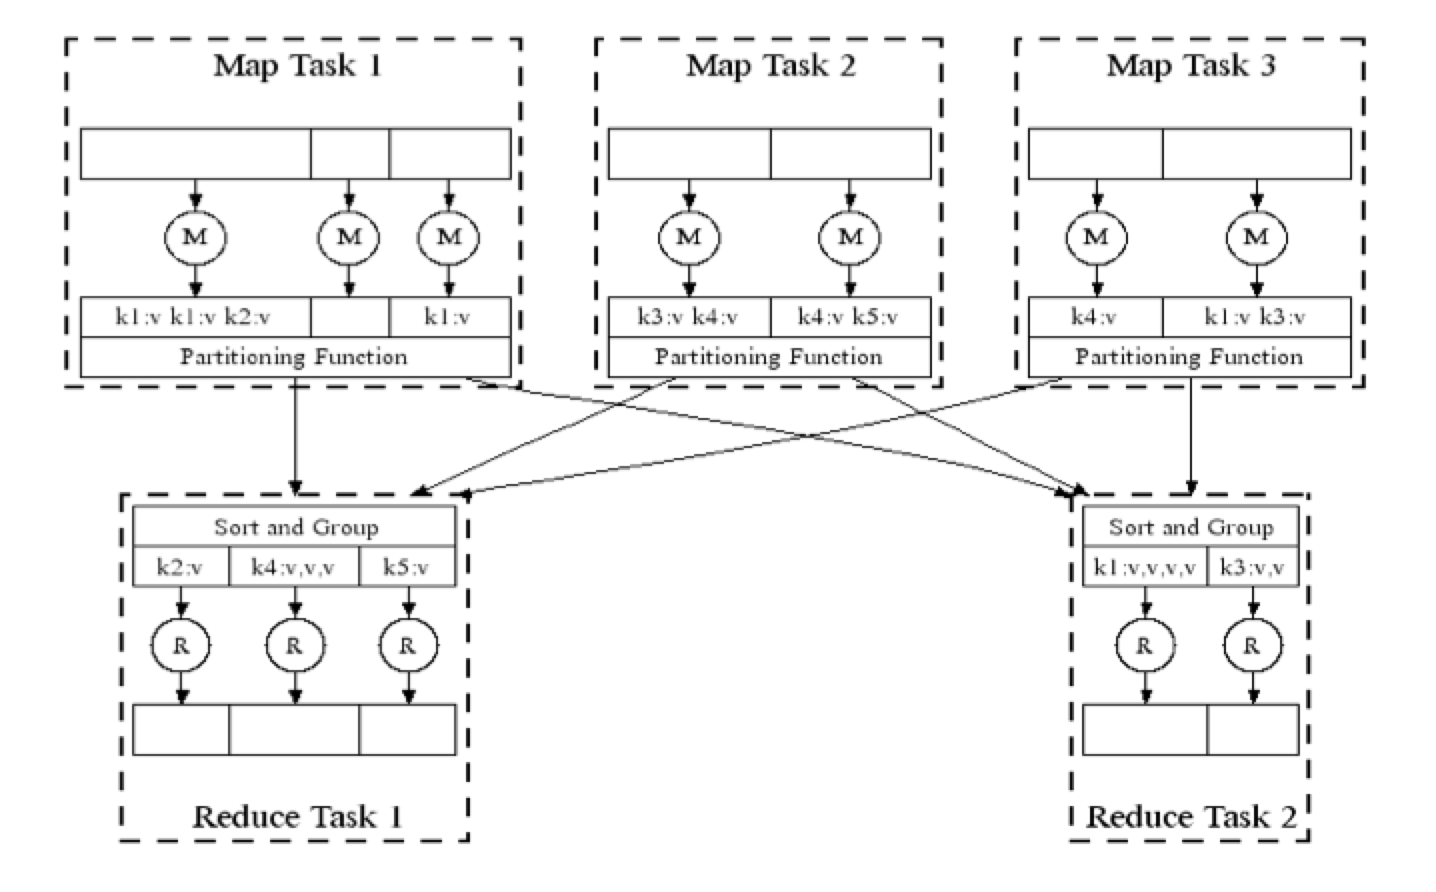

In [4]:
Image('images/map-reduce-2.png')

# Combiner

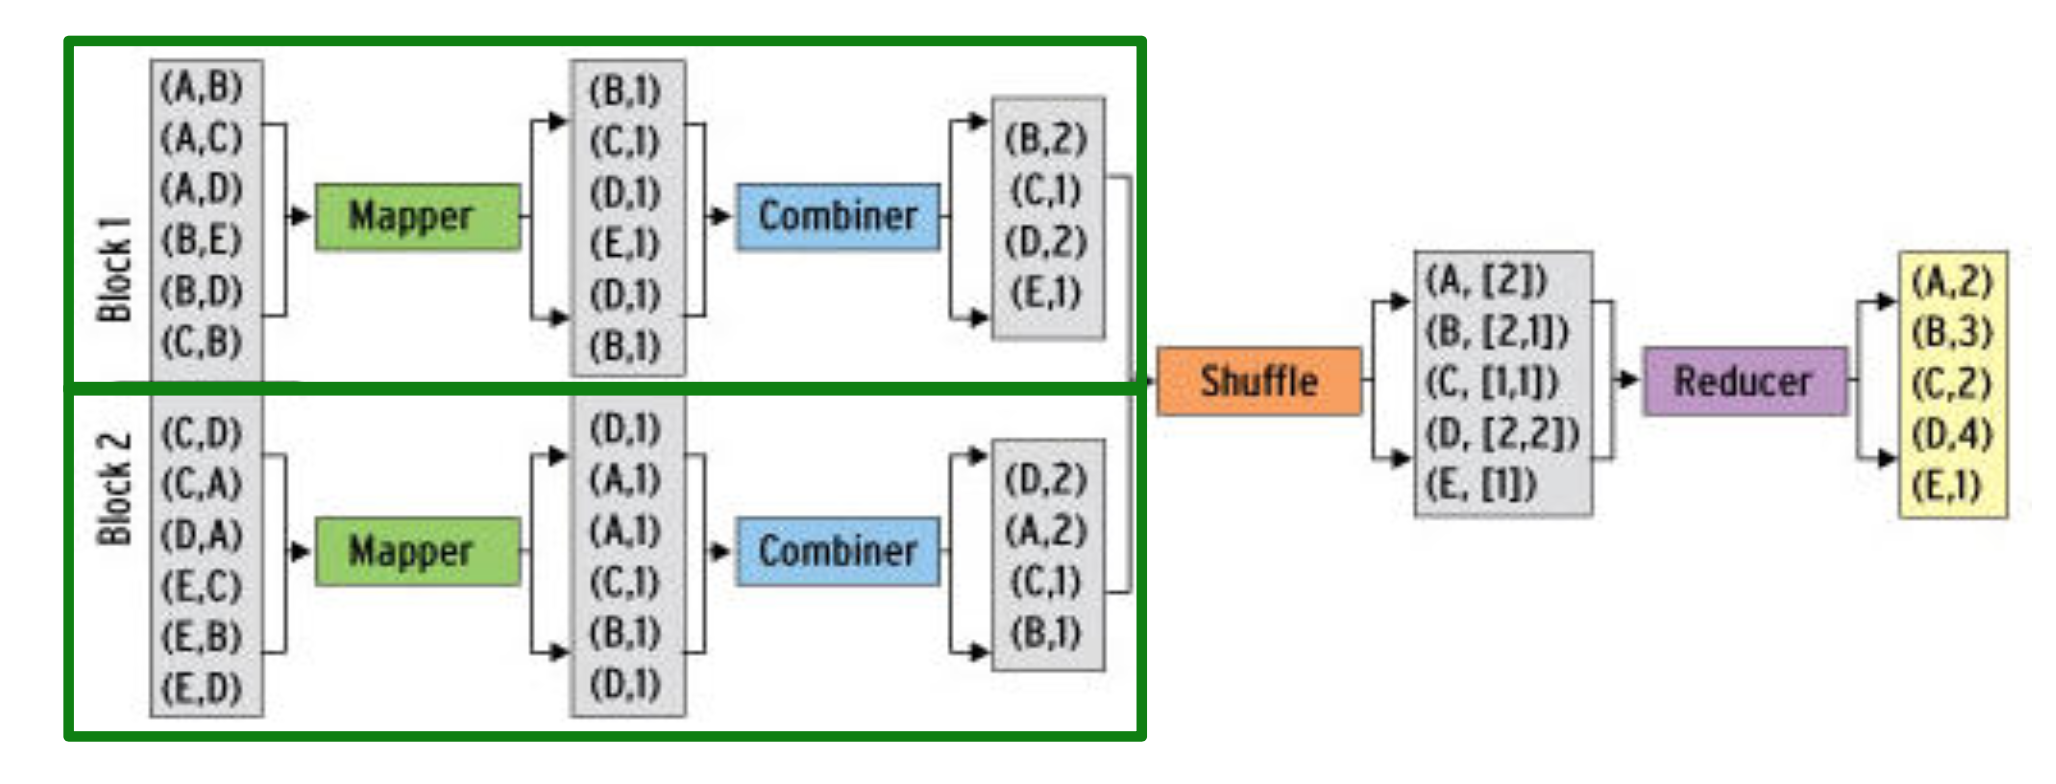

In [9]:
Image('images/combiner.png')

# combiner 性能比較


~~~ console
$ rm -r out ; pv citeseerx.40000|  lmr 300k 20 './ngramcount.py -m' './ngramcount.py -r' out
hashing script hashing.py.cC0k
 >>> Temporary output directory for mapper created: mapper_tmp.E2cP
 >>> Mappers running...
           #17
           #19
 >>> Reducer running. Temporary input directory: mapper_tmp.E2cP
 >>> Cleaning...
 >>> Temporary directory deleted: mapper_tmp.E2cP

 * Output directory: out
 * Elasped time: 0:01:18
~~~

### with combiner

~~~ console
$ rm -r out ; pv citeseerx.40000|  lmr 300k 20 './ngramcount.py -m' './ngramcount.py -r' out
hashing script hashing.py.MZdw
 >>> Temporary output directory for mapper created: mapper_tmp.CLVL
 >>> Mappers running...
           #18
           #19
 >>> Reducer running. Temporary input directory: mapper_tmp.CLVL
 >>> Cleaning...
 >>> Temporary directory deleted: mapper_tmp.CLVL

 * Output directory: out
 * Elasped time: 0:01:06
~~~


# Hash, Sort, Group

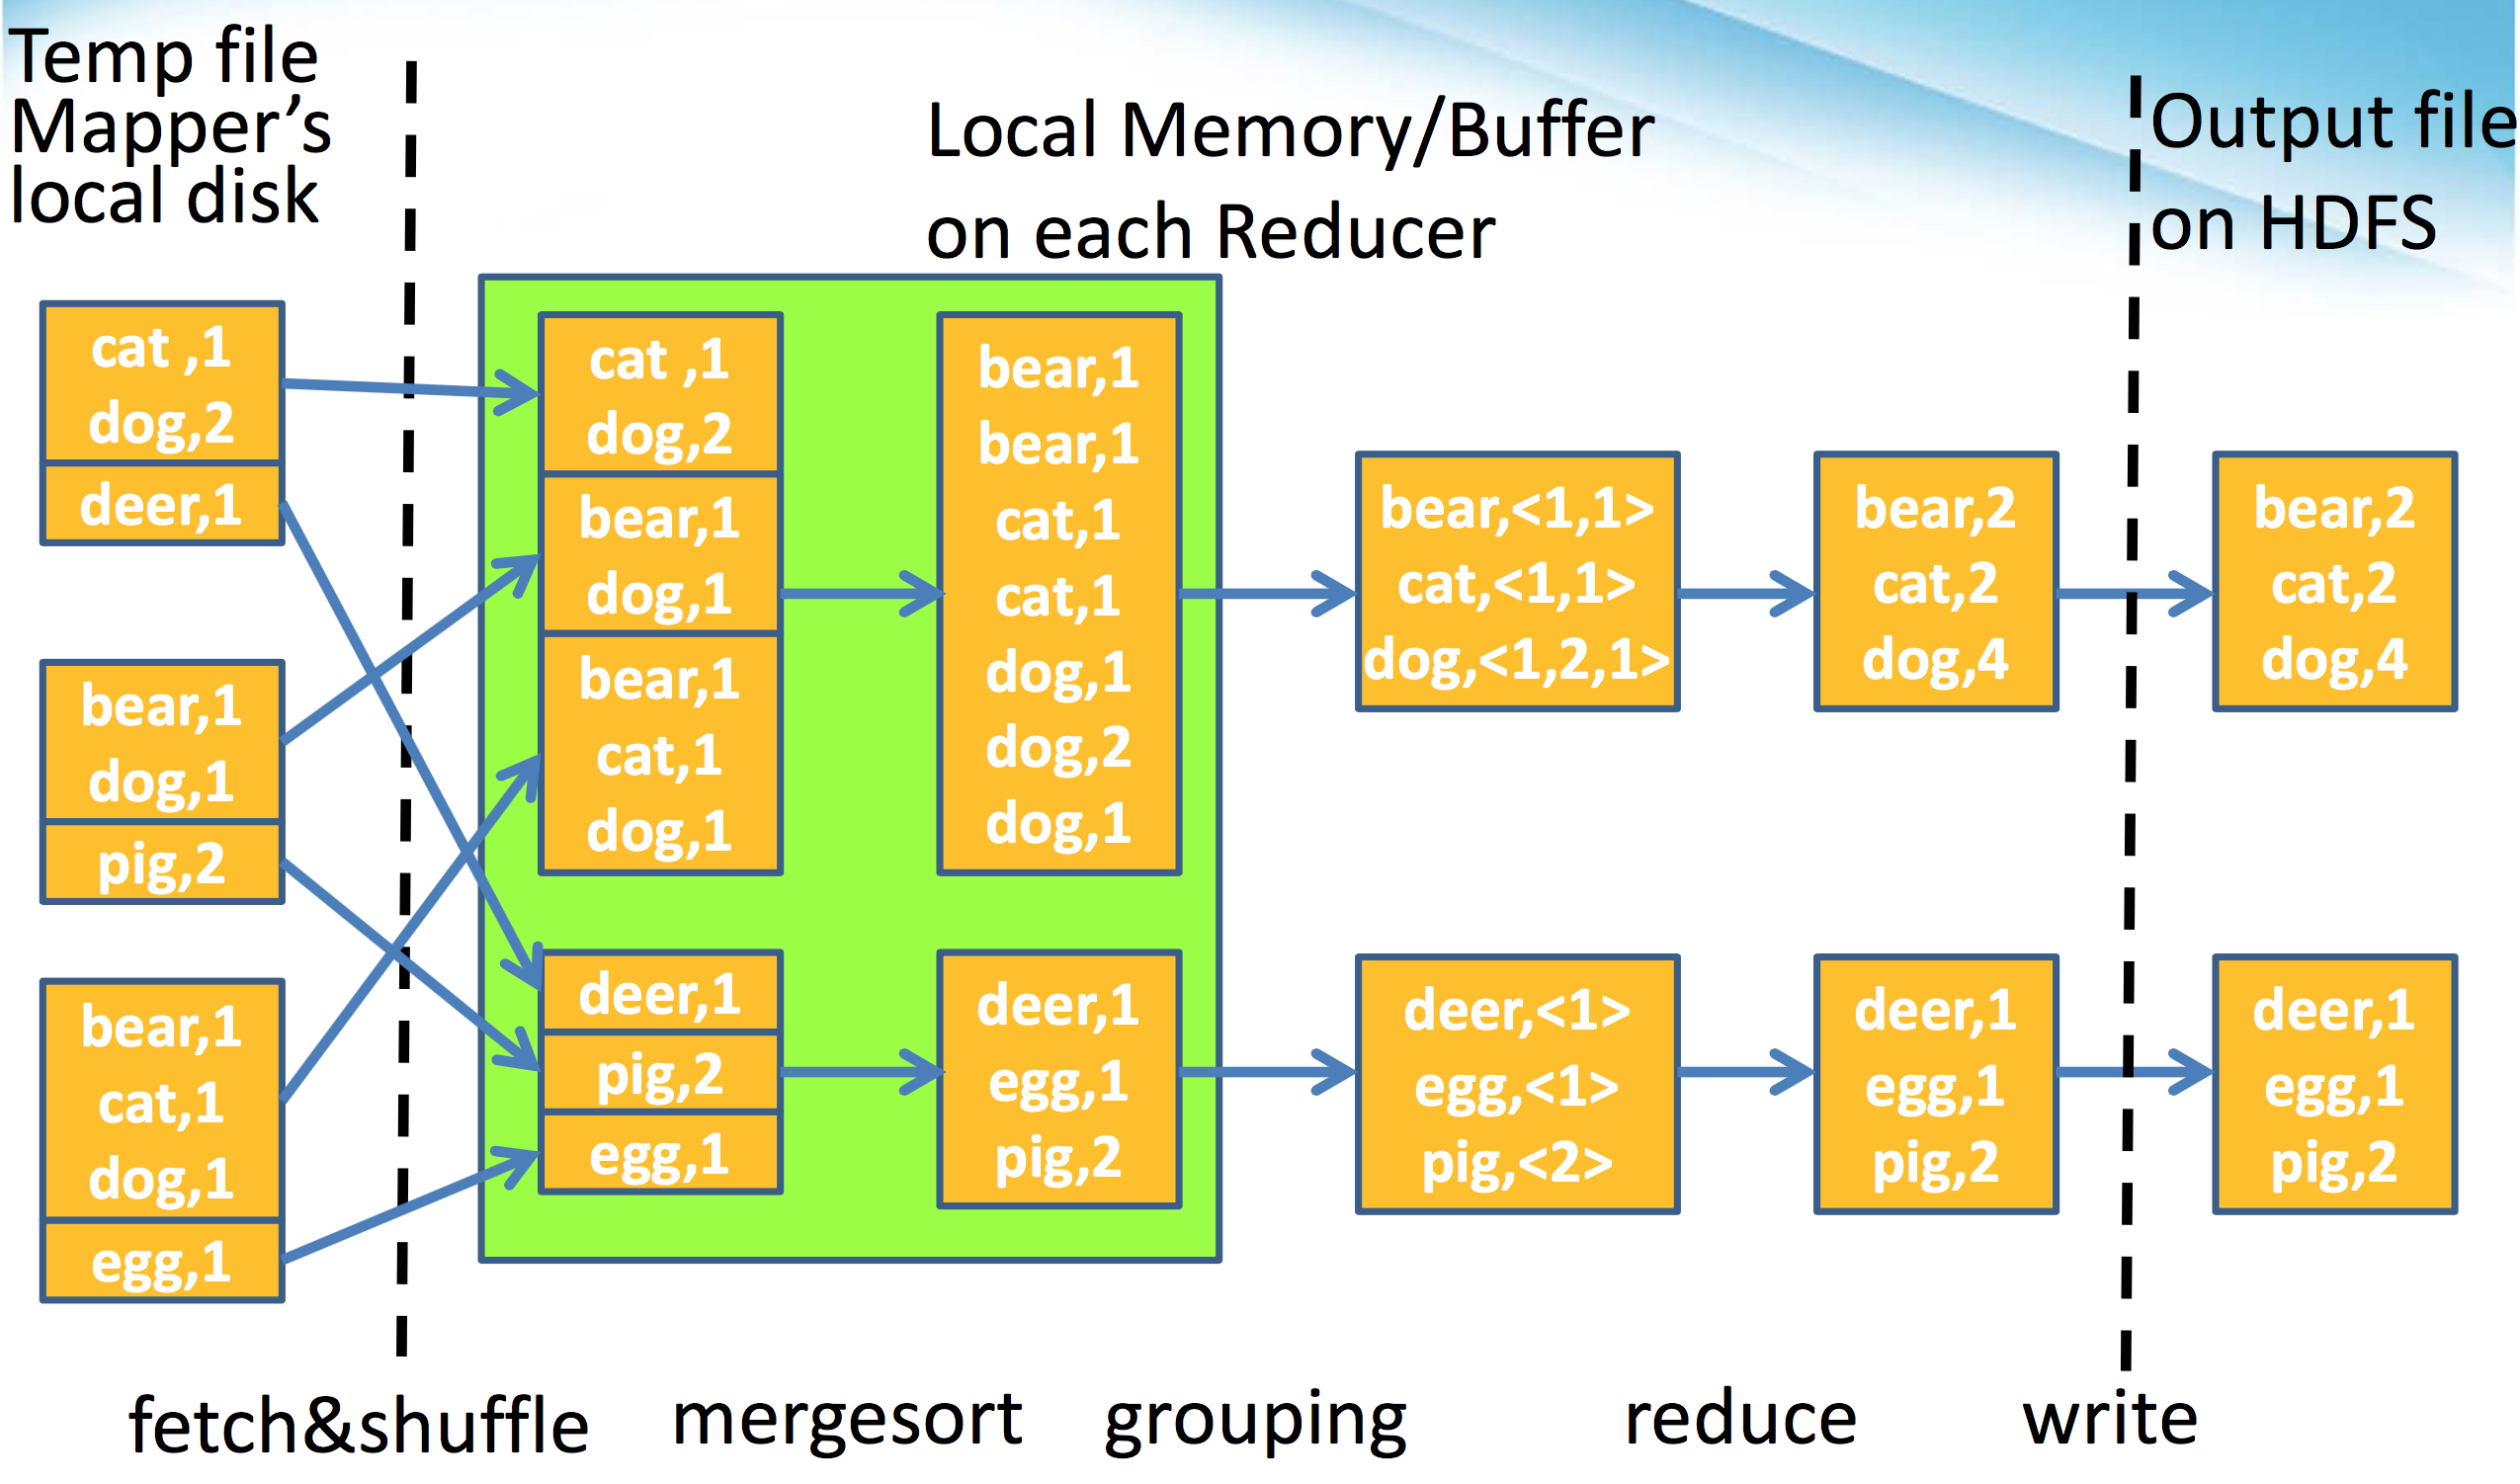

In [10]:
Image('images/hash-sort-group.png')

In [42]:
!curl https://raw.githubusercontent.com/wpm/Hadoop-Word-Count/master/src/main/java/wpmcn/hadoop/WordCount.java | pygmentize -l java

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2334  100  2334    0     0   7624      0 --:--:-- --:--:-- --:--:--  7627
package wpmcn.hadoop;

import org.apache.hadoop.conf.Configuration;
import org.apache.hadoop.conf.Configured;
import org.apache.hadoop.io.LongWritable;
import org.apache.hadoop.io.Text;
import org.apache.hadoop.mapreduce.Job;
import org.apache.hadoop.mapreduce.Mapper;
import org.apache.hadoop.mapreduce.Reducer;
import org.apache.hadoop.mapreduce.lib.input.TextInputFormat;
import org.apache.hadoop.mapreduce.lib.output.TextOutputFormat;
import org.apache.hadoop.util.Tool;
import org.apache.hadoop.util.ToolRunner;

import java.io.IOException;

public class WordCount extends Configured implements Tool {

   static public class WordCountMapper extends Mapper<LongWritable, Text, Text, LongWritable> {
      final private static LongWritable ONE = new LongWrita

In [77]:
!parallel -j1 'echo "\n\e[33m======" {} "======\e[m\n\n" ;pygmentize word-count/{}' ::: WordCount.java WordCountMapper.java WordCountPartitioner.java WordCountKeyComparator.java WordCountGroupComparator.java   WordCountReducer.java


====== WordCount.java ======


package part1;

import java.io.IOException;

import org.apache.hadoop.fs.Path;
import org.apache.hadoop.io.Text;
import org.apache.hadoop.io.IntWritable;

import org.apache.hadoop.mapred.FileInputFormat;
import org.apache.hadoop.mapred.FileOutputFormat;
import org.apache.hadoop.mapred.JobClient;
import org.apache.hadoop.mapred.JobConf;

public class WordCount {
    public static void main(String[] args) throws Exception {
        WordCount wc = new WordCount();
        wc.run(args[0], args[1]); 
    }
	
    public void run(String inputPath, String outputPath) throws IOException {
        /* 
         * You can lookup usage of these api from this website. =)
         * http://tool.oschina.net/uploads/apidocs/hadoop/index.html?overview-summary.html
         */
		 
        JobConf conf = new JobConf(WordCount.class);
        conf.setJobName("word count");
		
        conf.setMapperClass(WordCountMapper.class);
        conf.setReducerClass(WordCountReducer.cl

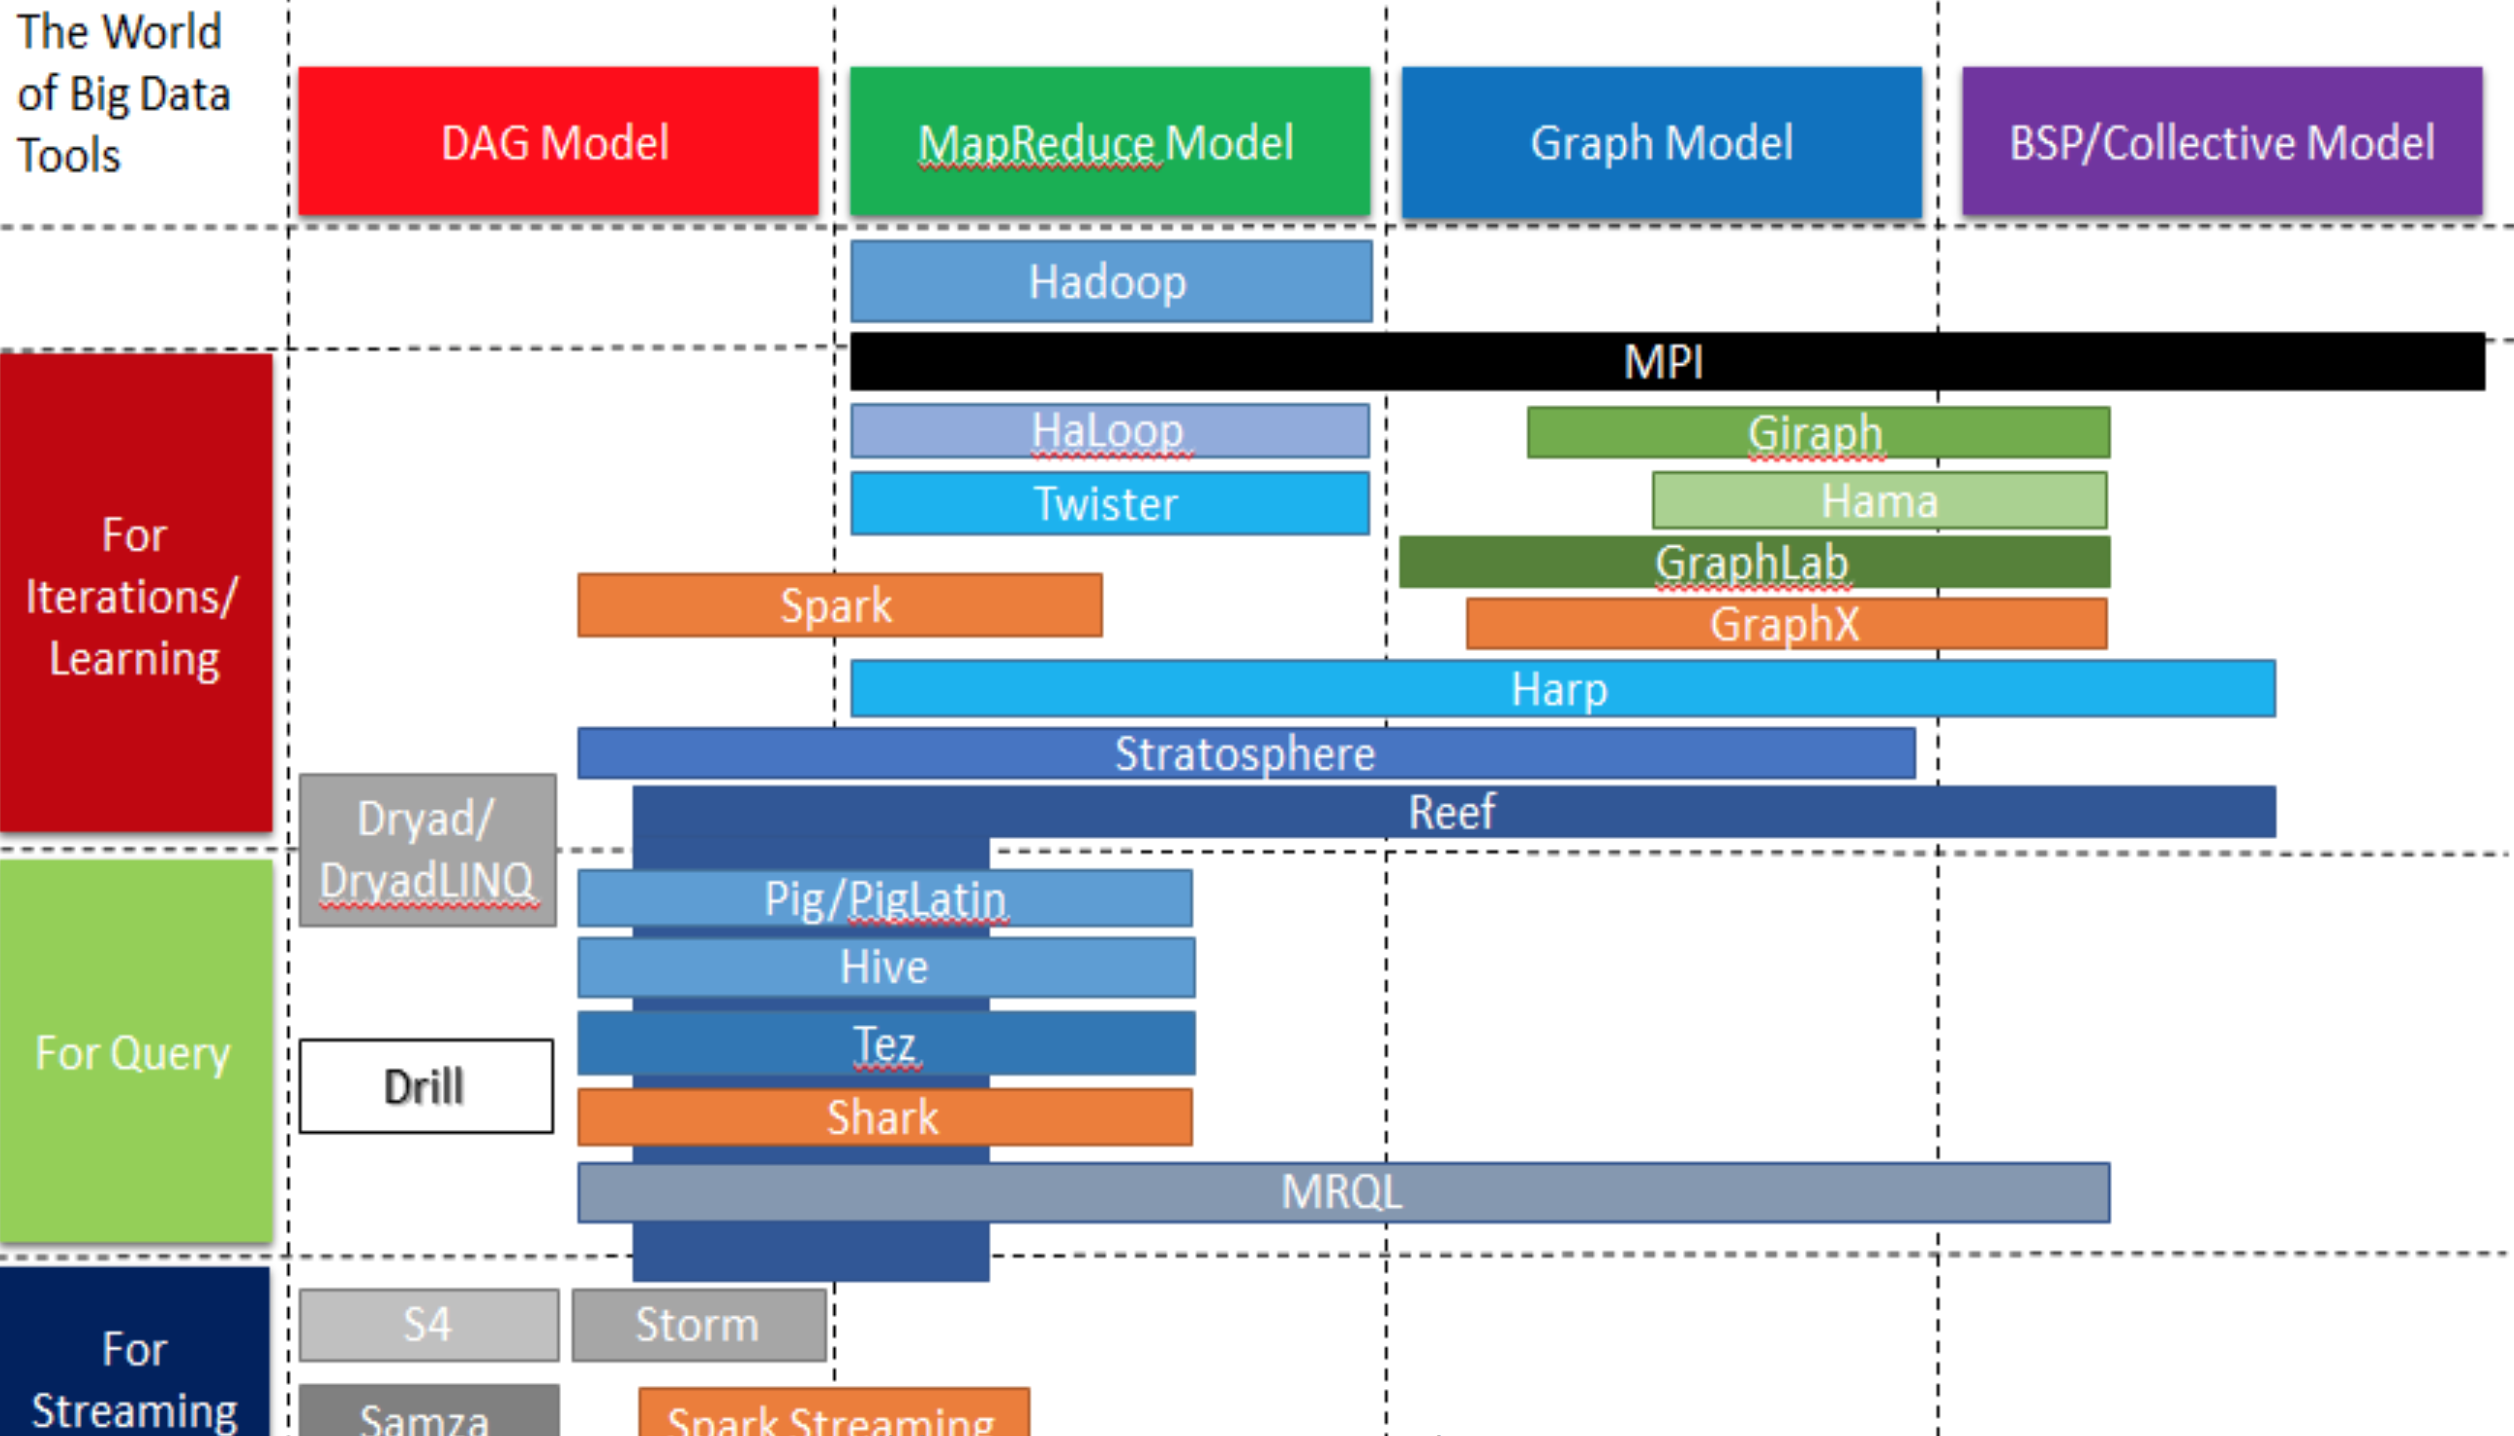

In [73]:
Image('images/big-data-tools.png')

# Spark

Word Count

### in python
~~~ python
text_file = spark.textFile("hdfs://...")
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
counts.saveAsTextFile("hdfs://...")
~~~

### in scala
~~~ scala
val textFile = spark.textFile("hdfs://...")
val counts = textFile.flatMap(line => line.split(" "))
                 .map(word => (word, 1))
                 .reduceByKey(_ + _)
counts.saveAsTextFile("hdfs://...")
~~~

### in java
~~~ java
JavaRDD<String> textFile = spark.textFile("hdfs://...");
JavaRDD<String> words = textFile.flatMap(new FlatMapFunction<String, String>() {
  public Iterable<String> call(String s) { return Arrays.asList(s.split(" ")); }
});
JavaPairRDD<String, Integer> pairs = words.mapToPair(new PairFunction<String, String, Integer>() {
  public Tuple2<String, Integer> call(String s) { return new Tuple2<String, Integer>(s, 1); }
});
JavaPairRDD<String, Integer> counts = pairs.reduceByKey(new Function2<Integer, Integer>() {
  public Integer call(Integer a, Integer b) { return a + b; }
});
counts.saveAsTextFile("hdfs://...");
~~~


# Pig

~~~ pig
A = load './input.txt';
B = foreach A generate flatten(TOKENIZE((chararray)$0)) as word;
C = group B by word;
D = foreach C generate COUNT(B), group;
store D into './wordcount';
~~~

# Hive
~~~ sql
CREATE TABLE docs (line STRING);
LOAD DATA INPATH 'text' OVERWRITE INTO TABLE docs;
CREATE TABLE word_counts AS
SELECT word, count(1) AS count FROM
(SELECT explode(split(line, '\s')) AS word FROM docs) word
GROUP BY word
ORDER BY word;
~~~


# Pig
## User Defined Function


#### test.pig

~~~ pig
Register 'test.py' using streaming_python as myfuncs;
b = foreach a generate myfuncs.concat('hello', 'world'), myfuncs.square(3);
~~~

#### test.py

~~~ python
from pig_util import outputSchema

@outputSchema("as:int")
def square(num):
    if num == None:
        return None
    return ((num) * (num))

@outputSchema("word:chararray")
def concat(word):
    return word + word
~~~

## Streaming

#### test.pig
~~~ pig
DEFINE CMD `perl PigStreaming.pl - nameMap` input(stdin using PigStreaming(',')) output(stdout using PigStreaming(','));
A = LOAD 'file';
B = STREAM B THROUGH CMD;
~~~

In [ ]:
!ipython nbconvert --to slides talk2.ipynb  --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.6.2"  --template slides.tpl --post serve

[NbConvertApp] Using existing profile dir: '/Users/joe/.ipython/profile_default'
[NbConvertApp] Converting notebook talk2.ipynb to slides
[NbConvertApp] Support files will be in talk2_files/
[NbConvertApp] Loaded template slides.tpl
[NbConvertApp] Writing 3096912 bytes to talk2.slides.html
[NbConvertApp] Serving local reveal.js
Serving your slides at http://127.0.0.1:8000/talk2.slides.html
Use Control-C to stop this server
